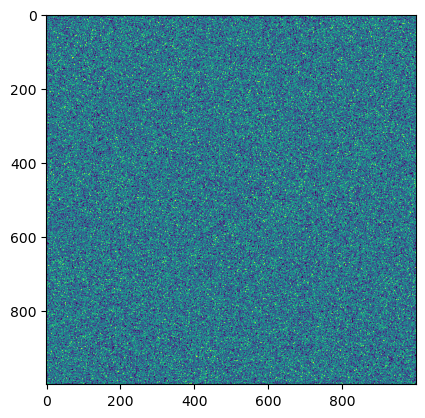

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# NETWORK SIZE
Ne = 800
Ni = 200

# GLOBAL PARAMETERS THAT SET OUR NEURON MODEL
re = np.random.rand(Ne, 1)
ri = np.random.rand(Ni, 1)
a = np.concatenate((0.02 * np.ones((Ne, 1)), 0.02 + 0.08 * ri))
b = np.concatenate((0.2 * np.ones((Ne, 1)), 0.25 - 0.05 * ri))
c = np.concatenate((-65 + 15 * re**2, -65 * np.ones((Ni, 1))))
d = np.concatenate((8 - 6 * re**2, 2 * np.ones((Ni, 1))))

# SET UP THE CONNECTIVITY MATRIX
frac_delete = 0.6
A = np.random.rand(Ne+Ni, Ne+Ni)
A[A < frac_delete] = 0
A[A > 0] = 1
np.fill_diagonal(A, 0)
plt.figure()
plt.imshow(A)
plt.show()

In [7]:
# SET SYNAPTIC WEIGHTS OF CONNECTIONS
MAX_EXC_WEIGTH = 1
MAX_INH_WEIGTH = 0.5
W = np.hstack((MAX_EXC_WEIGTH * np.random.rand(Ne+Ni, Ne), -MAX_INH_WEIGTH * np.random.rand(Ne+Ni, Ni)))

# The final connectivity matrix S
S = A * W

# DEFINE NOISE STRENGTH
NOISE_MAX = 0.5

# MAIN SIMULATION
v = -65 * np.ones((Ne+Ni, 1))
u = b * v
firings = []

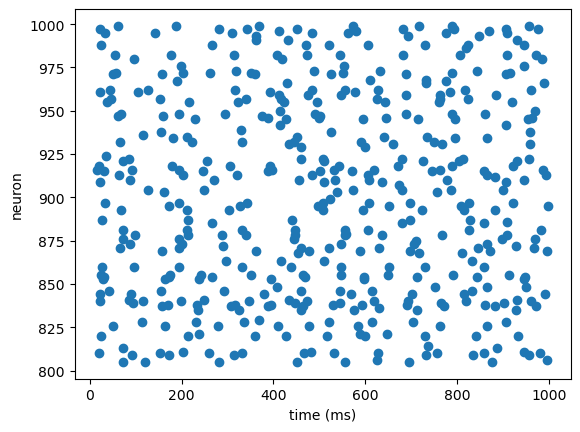

In [8]:
for t in range(1, 1001):
    I = np.concatenate((NOISE_MAX * np.random.randn(Ne, 1), 2 * np.random.randn(Ni, 1)))
    fired = np.where(v >= 30)[0]
    firings.extend(list(zip([t]*len(fired), fired)))
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    I = I + np.sum(S[:,fired], axis=1).reshape(-1,1)
    for _ in range(2):  # step 0.5 ms for numerical stability
        v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u = u + a * (b * v - u)

# PLOT RESULTS
firings = np.array(firings)
plt.figure()
plt.scatter(firings[:,0], firings[:,1])
plt.xlabel('time (ms)')
plt.ylabel('neuron')
plt.show()